<a href="https://colab.research.google.com/github/Sanj-bot/pytorch/blob/main/t5BasicNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import pandas as pd

In [3]:
#Create a Model Class that inherits nn.Module
class Model(nn.Module):
  #Input layer(4 features of the flower)
  #--->Hidden Layer1 (number of neurons)-->
  #H2(n)-->
  #output(3 classes of iris flowers)
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)


  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)

    return x


In [4]:
#pick a random seeed for randomization

torch.manual_seed(41)
model=Model()


In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:

my_df=pd.read_csv('iris.csv')

In [8]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [9]:
# change last column from strings to integers
my_df['variety']=my_df['variety'].replace('Setosa',0.0)
my_df['variety']=my_df['variety'].replace('Versicolor',1.0)
my_df['variety']=my_df['variety'].replace('Virginica',2.0)

In [10]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
#Train , test split! Set x,y
X=my_df.drop('variety',axis=1)
y=my_df['variety']

In [12]:
X=X.values
y=y.values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [14]:
# Convert X features to float tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [15]:
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [16]:
# set the criterion of model to measure the error, how fr off the predictions are from the data
criterion=nn.CrossEntropyLoss()
# Choose Adam Optimizer,lr=learning rate(if error doesn't go down after a bunch of iterations(epochs),lower learning rate)
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [17]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [20]:
#Train our model!
#Epochs? (one run thru all the training data in  your network)
epochs=1000
losses=[]
for i in range(epochs):
  #go forward and get a prediction
  y_pred=model.forward(X_train) # Get predicted results

  #Measure the loss/error, gonna be high at first
  loss=criterion(y_pred,y_train) #predicted values vs the y_train

  #keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i%10==0:
    print(f'Epoch: {i} and loss: {loss}')
  #do some backpropagation: take the error rate of forward prop and feed it back
  #thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 0.05286872014403343
Epoch: 10 and loss: 0.04508011043071747
Epoch: 20 and loss: 0.03979310765862465
Epoch: 30 and loss: 0.03596426919102669
Epoch: 40 and loss: 0.03302799537777901
Epoch: 50 and loss: 0.030512524768710136
Epoch: 60 and loss: 0.02773350290954113
Epoch: 70 and loss: 0.024612102657556534
Epoch: 80 and loss: 0.02167237363755703
Epoch: 90 and loss: 0.01932021789252758
Epoch: 100 and loss: 0.0174928717315197
Epoch: 110 and loss: 0.01604374870657921
Epoch: 120 and loss: 0.01483999565243721
Epoch: 130 and loss: 0.013800058513879776
Epoch: 140 and loss: 0.012878856621682644
Epoch: 150 and loss: 0.012144574895501137
Epoch: 160 and loss: 0.011606554500758648
Epoch: 170 and loss: 0.010983292944729328
Epoch: 180 and loss: 0.010267996229231358
Epoch: 190 and loss: 0.00971288699656725
Epoch: 200 and loss: 0.009499614126980305
Epoch: 210 and loss: 0.008920922875404358
Epoch: 220 and loss: 0.008430850692093372
Epoch: 230 and loss: 0.007952299900352955
Epoch: 240 and l

Text(0.5, 0, 'Epoch')

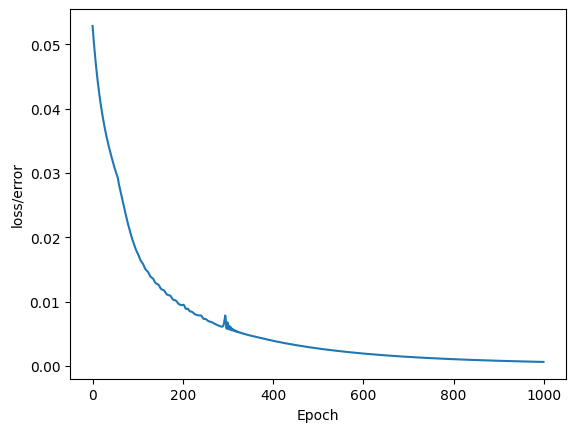

In [22]:
#Graph it out
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [23]:
#Evaluate Model on test dataset (validate model on test set)
with torch.no_grad():#basically turn off back propagation
  y_eval=model.forward(X_test) #X_test are fetures from our test set, y_eval will be predictions
  loss=criterion(y_eval,y_test) #Find the loss or error


In [24]:
loss

tensor(0.7717)

In [30]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)

    if y_test[i]==0:
      x="Setosa"
    elif y_test[i]==1:
      x="Versicolor"
    else:
      x="Virginica"
    print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}')
    #Correct or not
    if y_val.argmax().item()==y_test[i]:
      correct+=1
print(f'We got {correct} correct!')

1.) tensor([-10.9308,  -1.4830,  21.1928]) 	 Virginica 	 2
2.) tensor([-14.0945,  -6.5408,  31.7457]) 	 Virginica 	 2
3.) tensor([-16.2612,  -6.7658,  35.5809]) 	 Virginica 	 2
4.) tensor([ 14.9575,  28.1999, -21.6950]) 	 Versicolor 	 1
5.) tensor([-13.6377,  -3.9988,  28.3255]) 	 Virginica 	 2
6.) tensor([ 26.6687,  39.7100, -39.3517]) 	 Versicolor 	 1
7.) tensor([-8.6522,  1.9099, 17.4056]) 	 Virginica 	 2
8.) tensor([ 15.9187,  29.3146, -23.2762]) 	 Versicolor 	 1
9.) tensor([-12.3835,  -2.2215,  24.3798]) 	 Virginica 	 2
10.) tensor([-15.0841,  -7.1034,  33.9860]) 	 Virginica 	 2
11.) tensor([-5.2249,  5.5255, 11.6866]) 	 Virginica 	 2
12.) tensor([ 115.1166,  103.0535, -148.6721]) 	 Setosa 	 0
13.) tensor([ 104.4995,   93.3824, -134.8793]) 	 Setosa 	 0
14.) tensor([ 31.6806,  40.6455, -45.0327]) 	 Versicolor 	 1
15.) tensor([ 100.5185,   92.0007, -130.5122]) 	 Setosa 	 0
16.) tensor([-0.0589, 11.4578,  3.2085]) 	 Virginica 	 1
17.) tensor([ 105.6126,   94.8641, -136.5118]) 	 Setos